In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from PIL import Image
import math
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from textwrap import wrap


from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

In [34]:
output_dir = os.path.join('..', 'outputs', 'alexnet_107L')
target = 'f2'
target_name = 'Micro F2-Score'

scores_no_pw = []
scores_pw = []

experimentos = os.listdir(output_dir)
apellidos = ['', '_weighted_1']


# Iterar sobre archivos de resultados sacando el target buscado
for exp in experimentos:
    for apellido in apellidos:
        path_predicciones = os.path.join(output_dir, exp, f'{107}L{apellido}', 'metadata.csv')
        predicciones = pd.read_csv(path_predicciones, index_col = 0)
        score = float(predicciones.loc[[target]].values[0][0])
        #print(path_predicciones, score[0][0])
        if apellido == '':
            scores_no_pw.append(score)
        else:
            scores_pw.append(score)
        print(exp, apellido, score)
            
da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop': 3,
    'elastic': 4,
    'rain': 5,
    'randaug': 6,
    'gausblur': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref rot': 10,
    'rain ref rot': 11,
    'rain ref rot elastic': 12,
    'blur rain ref rot elastic': 13,
    'blur rain ref rot crop elastic': 14,
    'blur rain ref rot crop randaug elastic': 15,
}

base  0.2103
base _weighted_1 0.5605
blur  0.191
blur _weighted_1 0.5844
blur_rain_ref_rot_crop1_elastic1  0.1629
blur_rain_ref_rot_crop1_elastic1 _weighted_1 0.584
blur_rain_ref_rot_crop1_randaug1_elastic1  0.1478
blur_rain_ref_rot_crop1_randaug1_elastic1 _weighted_1 0.5834
blur_rain_ref_rot_elastic1  0.1935
blur_rain_ref_rot_elastic1 _weighted_1 0.5909
crop1  0.1923
crop1 _weighted_1 0.5517
elastic1  0.1779
elastic1 _weighted_1 0.5682
gausblur1  0.1695
gausblur1 _weighted_1 0.5781
mtnblur  0.1791
mtnblur _weighted_1 0.509
rain  0.1843
rain _weighted_1 0.5795
rain_ref_rot  0.1696
rain_ref_rot _weighted_1 0.2948
rain_ref_rot_elastic1  0.173
rain_ref_rot_elastic1 _weighted_1 0.5768
randaug1  0.1717
randaug1 _weighted_1 0.5708
ref  0.1775
ref _weighted_1 0.5854
ref_rot  0.1792
ref_rot _weighted_1 0.5853
rot  0.2078
rot _weighted_1 0.5604


In [35]:
techniques = []
for exp in experimentos:
    if 'weighted' not in exp:
        label = exp.replace('_', ' ')
        label = label.replace('1', '')
        techniques.append(str(da_map[label]))
techniques

['0',
 '8',
 '14',
 '15',
 '13',
 '3',
 '4',
 '7',
 '9',
 '5',
 '11',
 '12',
 '6',
 '2',
 '10',
 '1']

In [36]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['figure.dpi'] = 1000

11 0.2948 0.1696
9 0.509 0.1791
3 0.5517 0.1923
1 0.5604 0.2078
0 0.5605 0.2103
4 0.5682 0.1779
6 0.5708 0.1717
12 0.5768 0.173
7 0.5781 0.1695
5 0.5795 0.1843
15 0.5834 0.1478
14 0.584 0.1629
8 0.5844 0.191
10 0.5853 0.1792
2 0.5854 0.1775
13 0.5909 0.1935


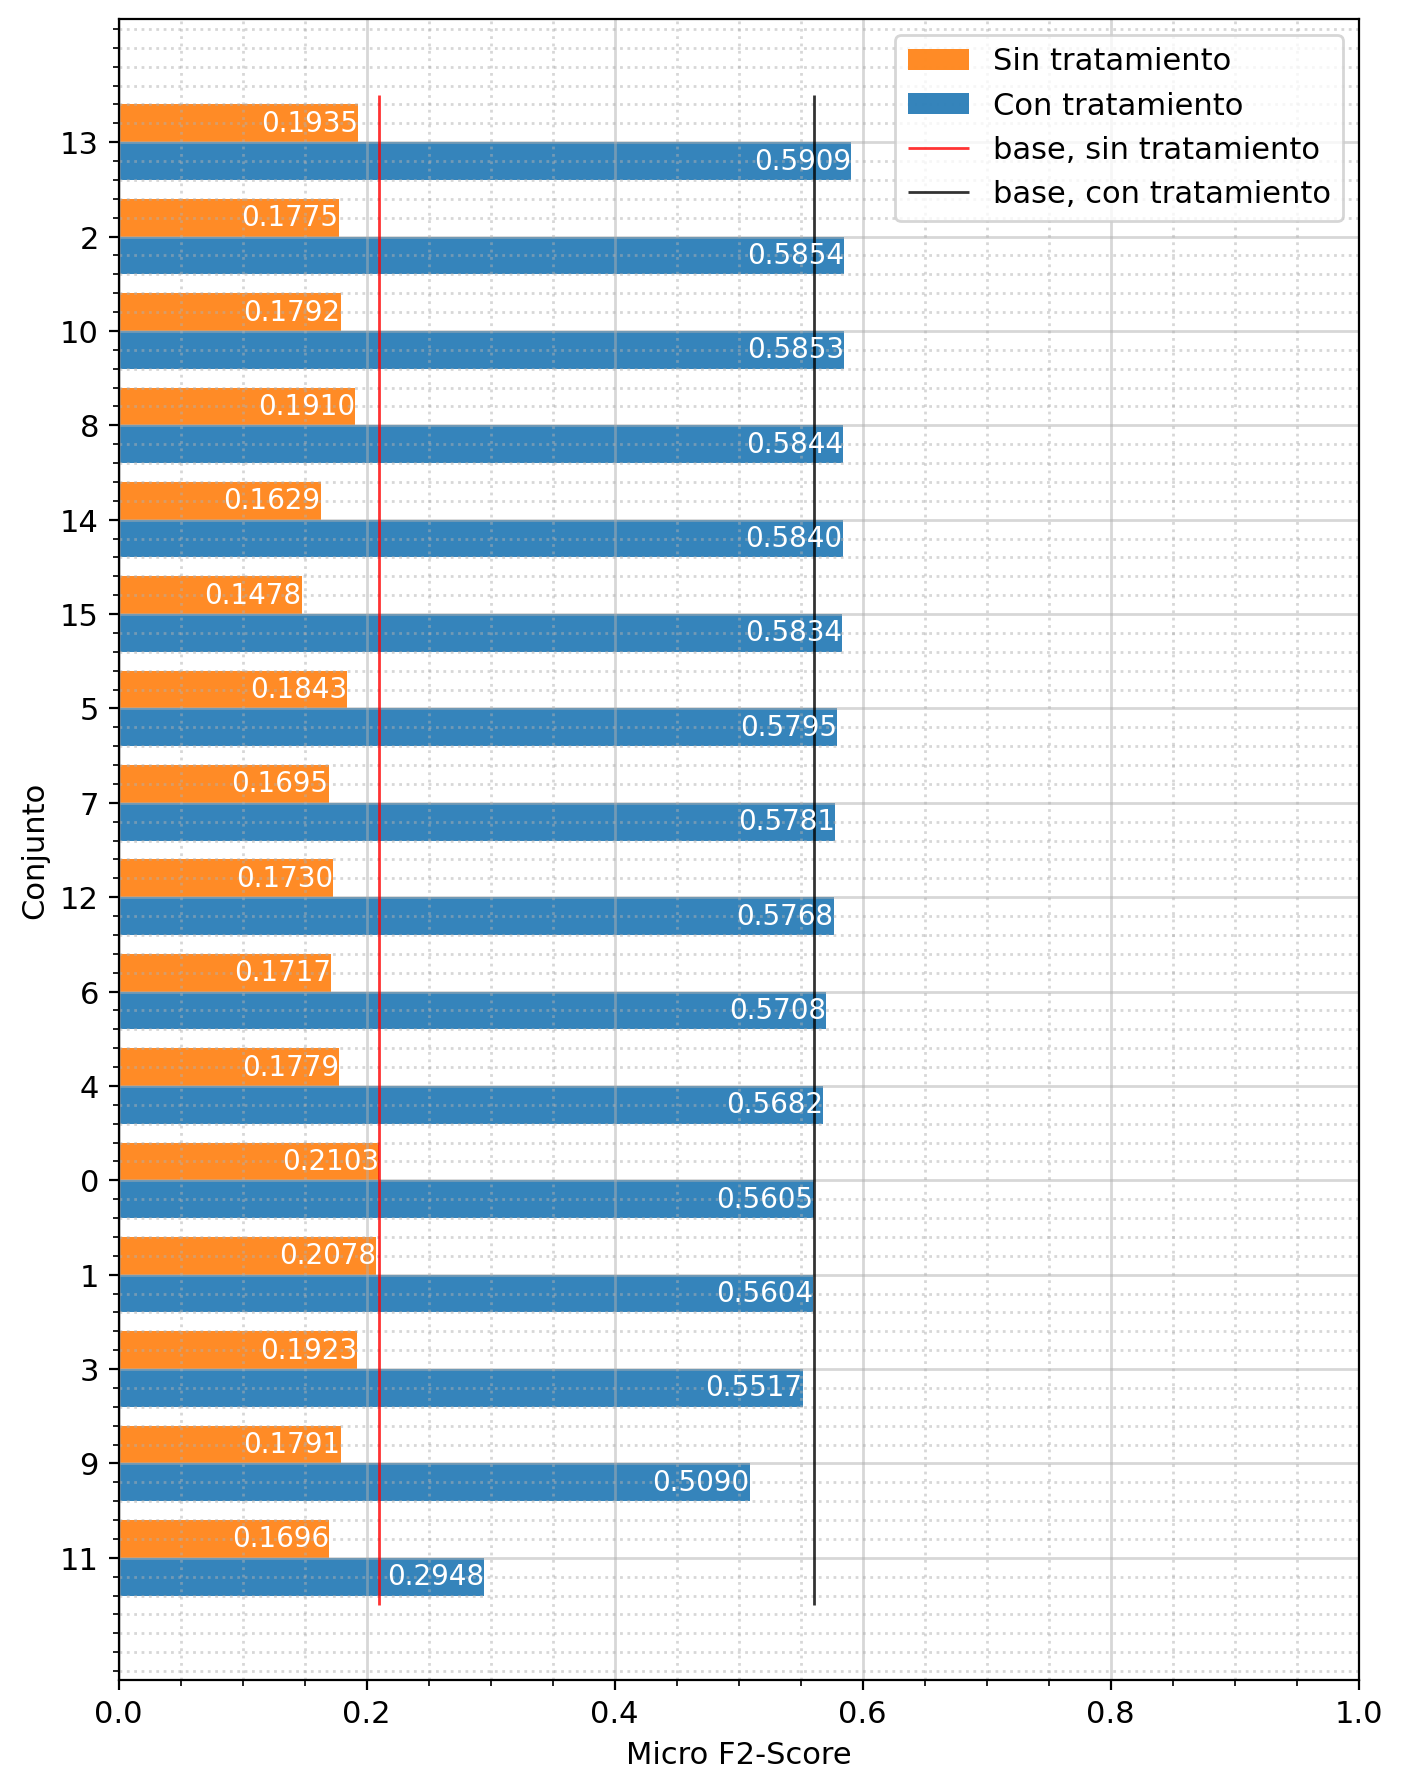

In [37]:
# ordenar 
s_pw, s_no_pw, techsorted = zip(*sorted(zip(scores_pw, scores_no_pw, techniques)))

for i in range(0, len(techniques)):
    print(techsorted[i], s_pw[i], s_no_pw[i])
     
# wrap de las etiquetas cuando exceden cierto largo
techsorted = ['\n'.join(wrap(l, 22)) for l in techsorted]
x = np.arange(len(techsorted))

fig, ax = plt.subplots()
width = 0.4

b1 = ax.barh(x - width/2, s_pw, width, label = 'Con tratamiento', color='tab:blue', alpha=0.9)
b2 = ax.barh(x + width/2, s_no_pw, width, label = 'Sin tratamiento', color='tab:orange', alpha=0.9)
order = [3, 2, 0, 1]


ax.set_xlabel(target_name)
ax.set_ylabel('Conjunto')

#ax.set_title(target_name + '\nAlexNet sobre 107 etiquetas más frecuentes\nVariando conjunto de datos')

# linea horizontal marcando el resultado base no pw
index_base = techsorted.index('0')
plt.vlines(x=s_no_pw[index_base], color='red', linewidth=1, 
           ymin=-0.5, ymax=15.5, label = 'base, sin tratamiento',
           alpha=0.8)
plt.vlines(x=s_pw[index_base], color='black', linewidth=1,
           ymin=-0.5, ymax=15.5, label = 'base, con tratamiento',
           alpha=0.8)

# rotar labels del eje x
#plt.xticks(rotation=90)
fig.set_size_inches(8, 11)
fig.set_dpi(200)

ax.grid(which='both')
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', alpha=0.5)
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='1', alpha=0.5)

            
# legends en orden deseado
handles, ls = plt.gca().get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[ls[idx] for idx in order], loc='upper right')
ax.bar_label(b1, fmt= '%.4f', padding=-35, color='white', size=10)
ax.bar_label(b2, fmt= '%.4f', padding=-35, color='white', size=10)
    
ax.set_yticks(x, techsorted)

ax.set_xlim(0, 1)
plt.show()


In [38]:
output_dir = os.path.join('..', 'outputs', 'alexnet_107L')
targets = ['f2', 'recall', 'precision', 'hs', 'emr', 'mr5']

scores = {}

experimentos = os.listdir(output_dir)
apellidos = ['', '_weighted_1']


# Armar diccionario de experimentos
for experimento in experimentos:
    for apellido in apellidos:
        scores[experimento + ';' + apellido] = {}
            
        
# Iterar sobre archivos de resultados sacando el target buscado
for target in targets:
    for exp in experimentos:
        for apellido in apellidos:
            path_predicciones = os.path.join(output_dir, exp, f'{107}L{apellido}', 'metadata.csv')
            predicciones = pd.read_csv(path_predicciones, index_col = 0)
            score = float(predicciones.loc[[target]].values[0][0])
            #print(path_predicciones, score[0][0])
            scores[exp + ';' + apellido][target] = score

            
da_map = {
    'base': 0,
    'rot': 1,
    'ref': 2,
    'crop1': 3,
    'elastic1': 4,
    'rain': 5,
    'randaug1': 6,
    'gausblur1': 7,
    'blur': 8,
    'mtnblur': 9,
    'ref_rot': 10,
    'rain_ref_rot': 11,
    'rain_ref_rot_elastic1': 12,
    'blur_rain_ref_rot_elastic1': 13,
    'blur_rain_ref_rot_crop1_elastic1': 14,
    'blur_rain_ref_rot_crop1_randaug1_elastic1': 15,
}

In [39]:
df = pd.DataFrame.from_dict(scores, orient='index')
df['balance'] = ['balance' if len(x.split(';')[1])>0 else 'sin balance' for x in list(df.index.values)]
df['conjunto'] = [da_map[x.split(';')[0]] for x in list(df.index.values)]
df = df[['conjunto', 'balance', 'f2', 'recall', 'precision', 'hs', 'emr', 'mr5']]

In [40]:
df

,conjunto,balance,f2,recall,precision,hs,emr,mr5
base;,0,sin balance,0.2103,0.1790,0.7239,0.1756,0.0026,0.0039
base;_weighted_1,0,balance,0.5605,0.7412,0.2857,0.2782,0.0013,0.4755
blur;,8,sin balance,0.1910,0.1607,0.8131,0.1567,0.0039,0.0039
blur;_weighted_1,8,balance,0.5844,0.6981,0.3557,0.3299,0.0052,0.4111
blur_rain_ref_rot_crop1_elastic1;,14,sin balance,0.1629,0.1356,0.8500,0.1315,0.0039,0.0039
blur_rain_ref_rot_crop1_elastic1;_weighted_1,14,balance,0.5840,0.7517,0.3094,0.3036,0.0013,0.5026
blur_rain_ref_rot_crop1_randaug1_elastic1;,15,sin balance,0.1478,0.1229,0.8358,0.1185,0.0026,0.0026
blur_rain_ref_rot_crop1_randaug1_elastic1;_weighted_1,15,balance,0.5834,0.7696,0.2967,0.2943,0.0013,0.5180
blur_rain_ref_rot_elastic1;,13,sin balance,0.1935,0.1637,0.7152,0.1598,0.0039,0.0039
blur_rain_ref_rot_elastic1;_weighted_1,13,balance,0.5909,0.7146,0.3519,0.3295,0.0052,0.4330


In [41]:
df.to_csv("Experimento5.csv")